In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import pandas as pd

mpl.rcParams["grid.color"] = "w"
mpl.rcParams["axes.facecolor"] = "w"
mpl.rcParams["axes.edgecolor"] = "w"
mpl.rcParams["axes.titlecolor"] = "w"
mpl.rcParams["axes.labelcolor"] = "w"
mpl.rcParams["text.color"] = "w"
mpl.rcParams["xtick.color"] = "w"
mpl.rcParams["ytick.color"] = "w"


mpl.rcParams["axes.facecolor"] = "k"
mpl.rcParams["figure.facecolor"] = "k"
mpl.rcParams["figure.figsize"] = (8,6)
mpl.rcParams["axes.grid"] = False

In [2]:
csv_path = os.path.expanduser("~/.keras/datasets/jena_climate_2009_2016.csv")
if os.path.exists(csv_path):
    print(f"csv_path = {csv_path}")
else:
    zip_path = keras.utils.get_file(
        origin="https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip",
        fname="jena_climate_2009_2016.csv.zip",
        extract=True,
    )
    print(f"zip_path = {zip_path}")

csv_path = /home/phunc20/.keras/datasets/jena_climate_2009_2016.csv


In [3]:
!ls ~/.keras/datasets/

jena_climate_2009_2016.csv


In [4]:
# Let's get the file path to jena_climate_2009_2016.csv.
# Besides, let's remove the .zip file in case we have downloaded it.
if not os.path.exists(csv_path):
    csv_path, _ = os.path.splitext(zip_path)
    !rm {zip_path}
    print(f"csv_path = {csv_path}")

In [5]:
!ls ~/.keras/datasets/

jena_climate_2009_2016.csv


In [6]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


This tutorial will just deal with **hourly predictions**, so start by **sub-sampling** the data from 10 minute intervals to 1h:

In [7]:
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
date_time = pd.to_datetime(df.pop("Date Time"),
                           format="%d.%m.%Y %H:%M:%S")
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [8]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

**(!1)** There is some problem: `df = df[5::6]` was correct logic, but unluckily the CSV file has missing
data. You could propose another way to try to extract the right data with the right time. For the time being, let's just ignore this.

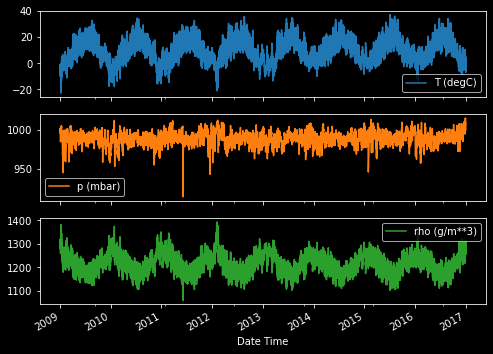

In [9]:
plot_cols = ["T (degC)", "p (mbar)", "rho (g/m**3)"]
plot_features = df[plot_cols]
plot_features.index = date_time
# You see _ = plot() is another way to suppress the output
# in addtion to plot();
_ = plot_features.plot(subplots=True)

`subplots=False` will plot all three curves in the same plot.

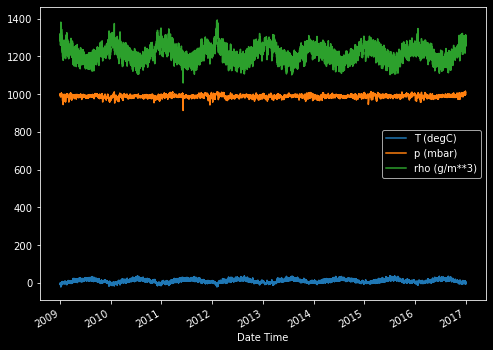

In [10]:
_ = plot_features.plot(subplots=False)

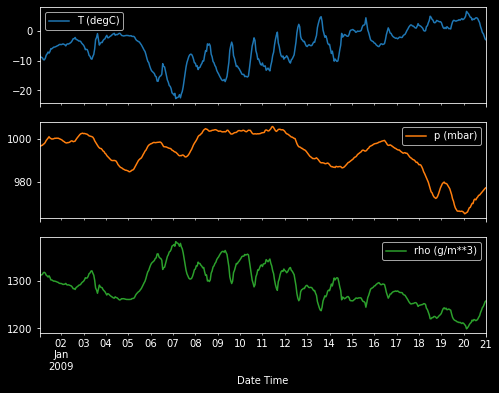

In [12]:
## Take a closer look
n_first = 480
plot_features = df[plot_cols][:n_first]
plot_features.index = date_time[:n_first]
_ = plot_features.plot(subplots=True)

## Inspect and Cleanup
Statistics.

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


### Wind velocity
One thing that should stand out is the `min` value of columns `wv (m/s)` and `max. wv (m/s)`. This `-9999` is
likely erroneous. There's a separate wind direction column (`wd (deg)`), so the velocity should be `>=0`.
Replace it with zero.

In [16]:
wv = df["wv (m/s)"]
bad_wv = wv < 0.0
wv[bad_wv] = 0.0

max_wv = df["max. wv (m/s)"]
bad_max_wv = max_wv < 0.0
max_wv[bad_max_wv] = 0.0

df["wv (m/s)"].min(), df["max. wv (m/s)"].min()

/home/phunc20/.config/miniconda3/envs/tf2/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/phunc20/.config/miniconda3/envs/tf2/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


(0.0, 0.0)

**(?)** Find a way to do the same thing as above but without warning message.